# Coding Our First Perceptron

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
# now we will create our perceptron class
class Perceptron:
    #creating an initializer
    def __init__(self,eta,epochs,activationfunction):
        self.weights = np.random.randn(3)*1e-4
        #since we want to keep small weights
        self.eta = eta
        self.epochs = epochs
        self.activationfunction=activationfunction
        #now we have defined the init part
        
    def fit(self,X,y):
        self.X = X
        self.y = y
        x_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print("Data Fitting Started")
        
        
        for epochs in range(self.epochs):
            y_hat = self.activationfunction(x_with_bias,self.weights)
            error = self.y - y_hat
            self.weights = self.weights+self.eta*np.dot(x_with_bias.T,error)
            #.T for Transpose
            print("Error at epoch number ",epochs," is :",error)
    
    def predict(self,X):
        x_with_bias = np.c_[X,-np.ones((len(self.X),1))]
        return self.activationfunction(x_with_bias,self.weights)

In [30]:
activationfunction = lambda inputs,weights: np.where(np.dot(inputs,weights)>0,1,0)

# AND GATE DATASET

In [31]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,0,0,1]}
AND = pd.DataFrame(data)

In [32]:
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [33]:
X = AND.drop('y',axis=1)

In [34]:
y = AND['y']

In [35]:
model = Perceptron(eta=0.01,epochs=10,activationfunction=activationfunction)

In [36]:
model.fit(X,y)

Data Fitting Started
Error at epoch number  0  is : 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Error at epoch number  1  is : 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Error at epoch number  2  is : 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Error at epoch number  3  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  4  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  5  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  6  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  7  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  8  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Error at epoch number  9  is : 0    0
1    0
2    0
3    0
Name: y, dtype: int64


In [37]:
model.predict(X)

array([0, 0, 0, 1])

# Analysis With Graph

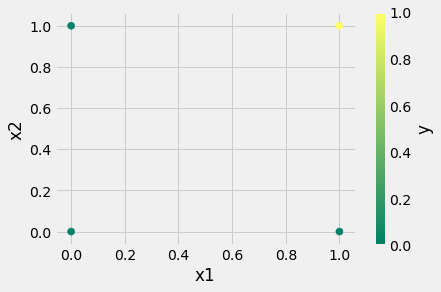

In [38]:
AND.plot(kind='scatter',x='x1',y='x2',c='y',cmap='summer',s=50)